In [2]:
import os
import datetime

import math
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from scipy import stats
from datetime import datetime


mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


In [3]:
# df = pd.read_json('../data/raw_data.json')

df = pd.read_json('../data/split_data.json')

df.head()

,feerate,fee,mempooldate,mempoolgrowthrate,networkdifficulty,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,txid,hash,version,size,vsize,weight,locktime,conf
0,2.443946,545,1643400017,1051.600000,2.664319e+13,24.700376,2320427.0,3.022747e+07,1.880815e+08,37146.85,4,15,f488b86e31ca7f41ae9a71d4ebfc6b84beda1e65c58540...,f488b86e31ca7f41ae9a71d4ebfc6b84beda1e65c58540...,1,223,223,892,0,NaN
1,3.730570,720,1643658307,1486.166667,2.664319e+13,17.180356,11148961.0,3.552558e+07,1.905301e+08,37918.62,0,14,f489070202b51fab92722d8a88fa25a226acf04ddd6c64...,8e373967da8ddd8aed5f83da52009ee314338e503baa4d...,2,193,111,442,0,NaN
2,2.450450,544,1643640267,1919.900000,2.664319e+13,17.180356,8801645.0,3.552558e+07,1.905301e+08,37918.62,0,9,f48908bf3a0b31dc52612e90c6a5e81dfe4a9cfc4df221...,1b456d461af83ba087c47b92efaca9e374a6aa4ab0a84d...,2,222,141,561,0,NaN
3,1.151832,220,1643926168,1156.633333,2.664319e+13,25.393390,744540.0,3.686031e+07,1.905301e+08,36912.68,3,17,f489215df64fbc8e1fb904160225c24845ee98493b448e...,7872e2dcf0ec004445cc143af4528df3d2085a56a8172e...,2,191,110,437,721691,NaN
4,6.986486,1551,1643740828,1062.083333,2.664319e+13,23.022607,13763416.0,3.411975e+07,1.914762e+08,38521.79,1,13,f4892898f2a057046d0fd0eb5756ffbcc5bc6bbeacb4c0...,01d5ed87d18ba909b1b5f6464076ccc364e16e49d3de2a...,1,222,141,561,0,NaN


In [4]:
# Drop meta data fields 
df.drop('txid', axis=1, inplace=True)
df.drop('hash', axis=1, inplace=True)
df.drop('version', axis=1, inplace=True)
df.drop('locktime', axis=1, inplace=True)
df.drop('vsize', axis=1, inplace=True)
df.drop('conf', axis=1, inplace=True)


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feerate,85109.0,1.063405e+01,2.798739e+01,2.814611e-01,2.849741e+00,5.044643e+00,7.869792e+00,2.511111e+03
fee,85109.0,5.290169e+03,4.616197e+04,1.100000e+02,7.620000e+02,1.410000e+03,2.700000e+03,7.683476e+06
mempooldate,85109.0,1.634818e+09,5.309574e+06,1.631484e+09,1.631534e+09,1.631542e+09,1.642687e+09,1.644085e+09
mempoolgrowthrate,85109.0,1.179566e+03,2.731630e+02,6.800667e+02,9.372000e+02,1.167567e+03,1.293483e+03,3.047633e+03
networkdifficulty,85109.0,2.047975e+13,3.381747e+12,1.841516e+13,1.841516e+13,1.841516e+13,2.437187e+13,2.668470e+13
averageconfirmationtime,85109.0,1.407554e+01,6.755538e+00,9.303310e+00,9.303310e+00,9.303310e+00,1.993199e+01,4.653260e+01
mempoolsize,85109.0,4.411527e+06,6.068788e+06,2.090120e+05,1.683532e+06,2.320427e+06,5.194808e+06,3.594906e+07
minerrevenue,85109.0,4.180368e+07,3.865057e+06,3.022747e+07,4.245540e+07,4.286986e+07,4.286986e+07,4.946986e+07
totalhashrate,85109.0,1.505376e+08,2.565651e+07,1.327710e+08,1.347850e+08,1.347850e+08,1.880815e+08,1.979092e+08
marketprice,85109.0,4.394287e+04,3.336221e+03,3.667882e+04,4.170785e+04,4.605912e+04,4.605912e+04,4.707212e+04


In [6]:
## Keep in mind the label is mempool size, everything else is a potential feature

df.corr(method ='pearson')

,feerate,fee,mempooldate,mempoolgrowthrate,networkdifficulty,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,size,weight
feerate,1.000000,0.233359,-0.013691,-0.005296,-0.010467,-0.009112,0.031257,-0.015503,-0.014865,0.006314,0.007332,0.014878,-0.014337,-0.008360
fee,0.233359,1.000000,0.003766,0.004912,0.005531,-0.001614,0.011382,-0.015745,0.002867,-0.007566,-0.010301,-0.005352,0.439145,0.413139
mempooldate,-0.013691,0.003766,1.000000,0.332318,0.992767,0.274450,0.392446,-0.545720,0.997300,-0.948186,-0.526274,0.003568,0.016394,0.014694
mempoolgrowthrate,-0.005296,0.004912,0.332318,1.000000,0.328102,-0.279642,0.204448,-0.202102,0.333109,-0.292887,-0.486823,-0.429989,0.009605,0.007243
networkdifficulty,-0.010467,0.005531,0.992767,0.328102,1.000000,0.323811,0.426694,-0.637899,0.981974,-0.976332,-0.562159,0.013809,0.018513,0.016590
averageconfirmationtime,-0.009112,-0.001614,0.274450,-0.279642,0.323811,1.000000,-0.137235,-0.390526,0.231996,-0.407923,0.149873,0.617409,0.009161,0.005797
mempoolsize,0.031257,0.011382,0.392446,0.204448,0.426694,-0.137235,1.000000,-0.512394,0.385832,-0.472901,-0.414125,-0.035186,0.006809,0.006866
minerrevenue,-0.015503,-0.015745,-0.545720,-0.202102,-0.637899,-0.390526,-0.512394,1.000000,-0.494485,0.755500,0.581880,-0.003820,-0.024367,-0.022101
totalhashrate,-0.014865,0.002867,0.997300,0.333109,0.981974,0.231996,0.385832,-0.494485,1.000000,-0.926793,-0.505378,-0.005675,0.015062,0.013579
marketprice,0.006314,-0.007566,-0.948186,-0.292887,-0.976332,-0.407923,-0.472901,0.755500,-0.926793,1.000000,0.556451,-0.062410,-0.020521,-0.018373


<AxesSubplot:xlabel='mempooldate'>

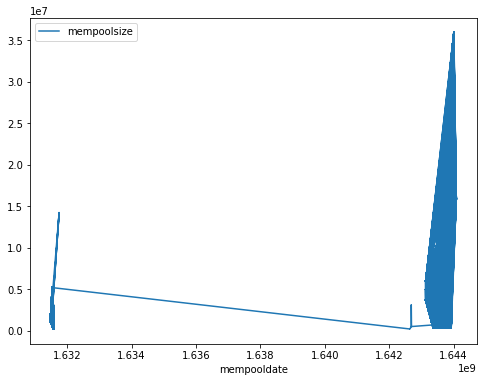

In [7]:
# plot the label 
df.plot(x = 'mempooldate', y = 'mempoolsize', kind = 'line')

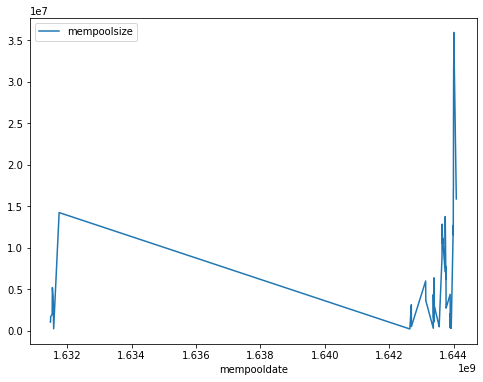

In [8]:
df.sort_values(by = 'mempooldate').plot(x = 'mempooldate', y = 'mempoolsize', kind = 'line')

df = df.sort_values(by = 'mempooldate')

In [9]:
## Taking a look at all the distrabutions

fig, ax = plt.subplots(3, 5, figsize = (25, 15))
count = 0
for i in range(3):
  for j in range(5):
    ax[i, j].hist(df[df.columns[count]])
    ax[i, j].set_title(df.columns[count])
    
    count+=1

IndexError: index 14 is out of bounds for axis 0 with size 14

In [10]:
sns.pairplot(df)

KeyboardInterrupt: 

In [5]:
df.drop(columns = 'networkdifficulty', inplace=True)

In [6]:
def as_date(ts):
  return(datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

df.mempooldate = pd.to_datetime(df.mempooldate.apply(as_date))




In [7]:
df.set_index('mempooldate', drop = True, inplace=True)

In [8]:
# group by each unique timestamp
df = df.reset_index().groupby('mempooldate').mean()

In [9]:
# resample to 15 sec intervals and foward fill when NA;s get created
# pad -> forward fill
# iloc -> first row is all na's skip that boi
df = df.resample('15S').pad().iloc[1:,:]

In [10]:
df.head()

,feerate,fee,mempoolgrowthrate,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,size,weight
mempooldate,,,,,,,,,,,,
2021-09-12 18:00:15,2.438971,2329.250000,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,1000.000000,2428.750000
2021-09-12 18:00:30,5.228779,3386.333333,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,1233.000000,4496.500000
2021-09-12 18:00:45,7.000000,1806.000000,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,258.000000,1032.000000
2021-09-12 18:01:00,29.306878,5539.000000,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,189.000000,756.000000
2021-09-12 18:01:15,5.878853,1271.333333,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,212.333333,630.333333


Text(0, 0.5, 'Mempool Size')

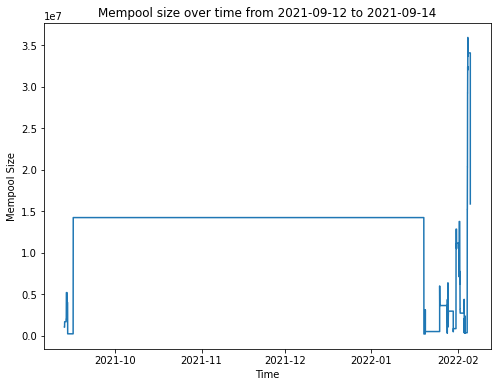

In [11]:
plt.figure()
plt.plot(df.index, df.mempoolsize)
plt.title('Mempool size over time from 2021-09-12 to 2021-09-14')
plt.xlabel('Time')
plt.ylabel('Mempool Size')

In [12]:
## Split data
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [13]:
## Normalize the dataset with min / max
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

train_df.head()

,feerate,fee,mempoolgrowthrate,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,size,weight
mempooldate,,,,,,,,,,,,
2021-09-12 18:00:15,-4.297570,-2.433448,-5.680497,1.123605,-5.681129,-7.608009,8.677824,-8.969011,-2.693085,-2.693085,0.607130,0.355241
2021-09-12 18:00:30,-3.466879,-1.779796,-5.680497,1.123605,-5.681129,-7.608009,8.677824,-8.969011,-2.693085,-2.693085,0.833870,0.856443
2021-09-12 18:00:45,-2.939482,-2.757002,-5.680497,1.123605,-5.681129,-7.608009,8.677824,-8.969011,-2.693085,-2.693085,-0.114934,0.016683
2021-09-12 18:01:00,3.702598,-0.448686,-5.680497,1.123605,-5.681129,-7.608009,8.677824,-8.969011,-2.693085,-2.693085,-0.182080,-0.050216
2021-09-12 18:01:15,-3.273313,-3.087615,-5.680497,1.123605,-5.681129,-7.608009,8.677824,-8.969011,-2.693085,-2.693085,-0.159374,-0.080677


In [182]:
# TODO later Remove outliers

# df = df[(np.abs(stats.zscore(df['fee'])) < 3)]
# df.describe().transpose()


In [14]:
# TODO this matters only when were doing fee estimation
tx_with_conf = df[df.conf.notnull()]

tx_with_conf.head()
print(f"{len(tx_with_conf)} of txs have confirmation times out of {len(df)}")


AttributeError: 'DataFrame' object has no attribute 'conf'

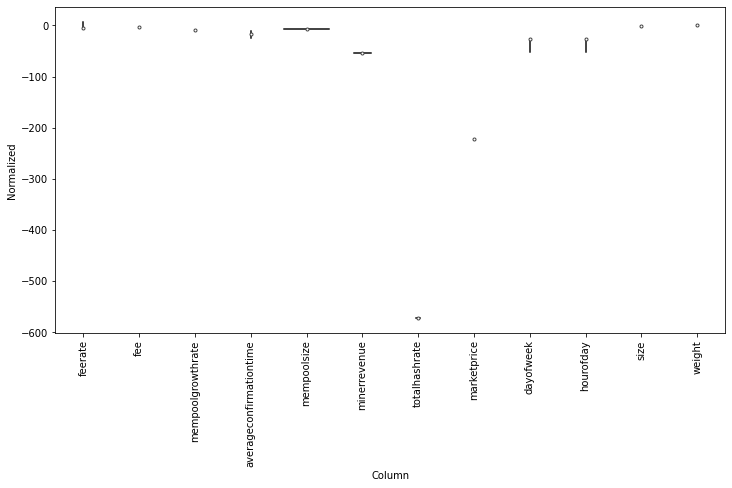

In [15]:

df_std = (train_df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [17]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [18]:
## Test the window generator
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['mempoolsize'])

print(w1)

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['mempoolsize']


In [19]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [20]:
w2 = WindowGenerator(input_width=5000, label_width=1, shift=1,
                     label_columns=['mempoolsize'])
w2

Total window size: 5001
Input indices: [   0    1    2 ... 4997 4998 4999]
Label indices: [5000]
Label column name(s): ['mempoolsize']

In [21]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 5001, 12)
Inputs shape: (3, 5000, 12)
Labels shape: (3, 1, 1)
2022-02-13 10:13:59.794146: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
w2.example = example_inputs, example_labels

In [23]:
def plot(self, model=None, plot_col='mempoolsize', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

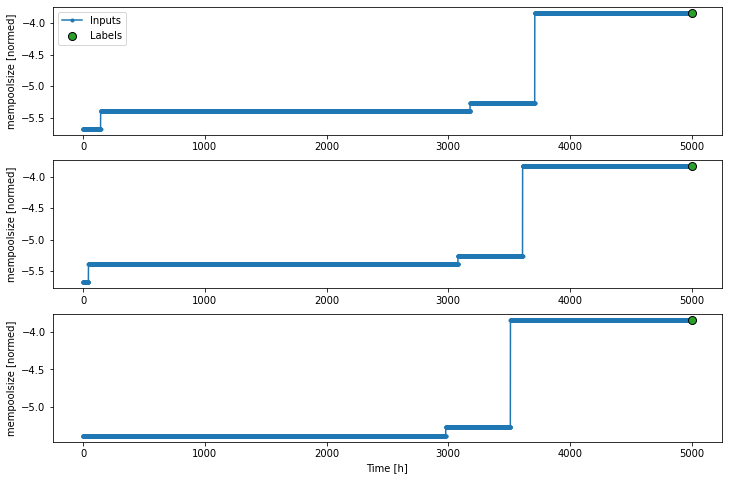

In [24]:
w2.plot()

In [25]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [26]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [27]:
w1.train.element_spec

(TensorSpec(shape=(None, 24, 12), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [28]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 24, 12)
Labels shape (batch, time, features): (32, 1, 1)


In [29]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['mempoolsize'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['mempoolsize']

In [30]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 12)
Labels shape (batch, time, features): (32, 1, 1)


In [31]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

baseline = Baseline(label_index=column_indices['mempoolsize'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

5249/5249 [==============================] - 5s 976us/step - loss: 2.4841e-04 - mean_absolute_error: 5.1656e-05


In [32]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['mempoolsize'])

print(wide_window)
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)


Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['mempoolsize']
Input shape: (32, 24, 12)
Output shape: (32, 24, 1)


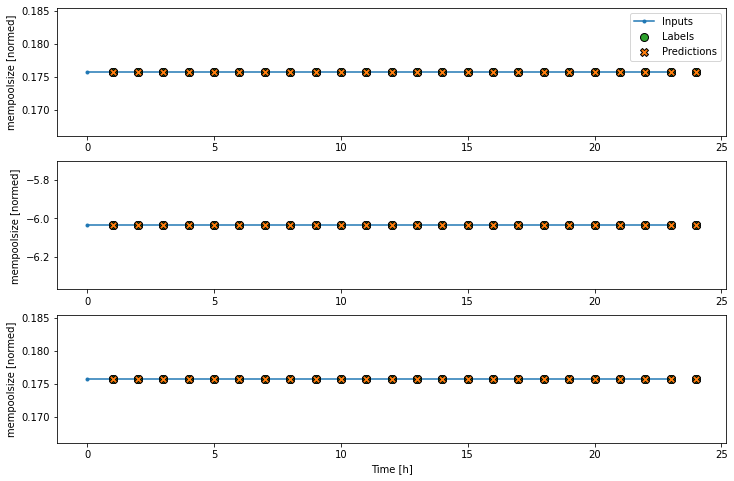

In [33]:
wide_window.plot(baseline)

In [34]:
df.head()


,feerate,fee,mempoolgrowthrate,averageconfirmationtime,mempoolsize,minerrevenue,totalhashrate,marketprice,dayofweek,hourofday,size,weight
mempooldate,,,,,,,,,,,,
2021-09-12 18:00:15,2.438971,2329.250000,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,1000.000000,2428.750000
2021-09-12 18:00:30,5.228779,3386.333333,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,1233.000000,4496.500000
2021-09-12 18:00:45,7.000000,1806.000000,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,258.000000,1032.000000
2021-09-12 18:01:00,29.306878,5539.000000,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,189.000000,756.000000
2021-09-12 18:01:15,5.878853,1271.333333,925.9,19.931991,1030166.0,4.245540e+07,1.348197e+08,45144.79,18.0,18.0,212.333333,630.333333


In [35]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

print(linear.summary())

Input shape: (32, 1, 12)
Output shape: (32, 1, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 1, 1)                13        
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [37]:
history = compile_and_fit(linear, wide_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)



Epoch 1/20
18370/18370 [==============================] - 27s 1ms/step - loss: 0.0373 - mean_absolute_error: 0.0116 - val_loss: 665.9786 - val_mean_absolute_error: 6.9653
Epoch 2/20
18370/18370 [==============================] - 28s 2ms/step - loss: 4.3571e-04 - mean_absolute_error: 0.0020 - val_loss: 670.9198 - val_mean_absolute_error: 6.9902
Epoch 3/20
18370/18370 [==============================] - 28s 2ms/step - loss: 3.0603e-04 - mean_absolute_error: 0.0017 - val_loss: 619.9644 - val_mean_absolute_error: 6.7197
Epoch 4/20
18370/18370 [==============================] - 31s 2ms/step - loss: 2.4130e-04 - mean_absolute_error: 0.0015 - val_loss: 554.6718 - val_mean_absolute_error: 6.3562
Epoch 5/20
18370/18370 [==============================] - 33s 2ms/step - loss: 1.8494e-04 - mean_absolute_error: 0.0013 - val_loss: 518.2369 - val_mean_absolute_error: 6.1439
Epoch 6/20
18370/18370 [==============================] - 34s 2ms/step - loss: 1.5441e-04 - mean_absolute_error: 0.0011 - val_los

{'Baseline': [0.0002484103024471551, 5.165560287423432e-05], 'Linear': [417.9665222167969, 5.519769191741943]} {'Baseline': [0.001962397014722228, 0.000818207859992981], 'Linear': [4159.509765625, 64.08971405029297]}


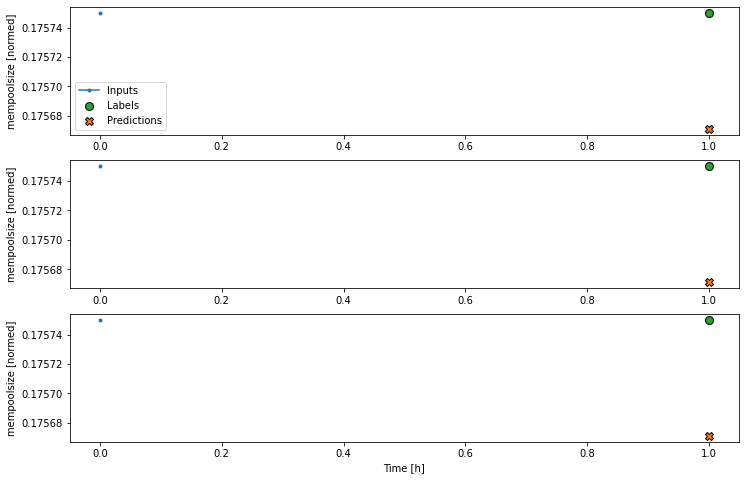

In [38]:
print(val_performance, performance)

single_step_window.plot(linear)

In [40]:
## Dense single input step models

dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
18371/18371 [==============================] - 34s 2ms/step - loss: 0.0031 - mean_absolute_error: 0.0038 - val_loss: 4.9851 - val_mean_absolute_error: 0.6023
Epoch 2/20
18371/18371 [==============================] - 39s 2ms/step - loss: 5.6879e-04 - mean_absolute_error: 0.0019 - val_loss: 14.6119 - val_mean_absolute_error: 1.0318
Epoch 3/20
18371/18371 [==============================] - 39s 2ms/step - loss: 4.2674e-04 - mean_absolute_error: 0.0017 - val_loss: 0.0325 - val_mean_absolute_error: 0.0351
Epoch 4/20
18371/18371 [==============================] - 38s 2ms/step - loss: 2.6407e-04 - mean_absolute_error: 0.0013 - val_loss: 0.7132 - val_mean_absolute_error: 0.2277
Epoch 5/20
5249/5249 [==============================] - 8s 1ms/step - loss: 0.3254 - mean_absolute_error: 0.1514


In [41]:
print(val_performance)

{'Baseline': [0.0002484103024471551, 5.165560287423432e-05], 'Linear': [417.9665222167969, 5.519769191741943], 'Dense': [0.3254460394382477, 0.15136438608169556]}


In [1]:
#RNNs

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

NameError: name 'tf' is not defined

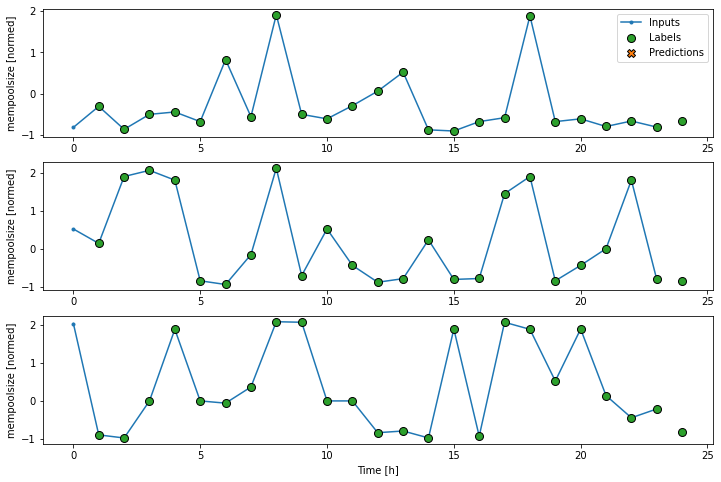

In [73]:
wide_window.plot(lstm_model)



In [74]:
print(val_performance, performance)

{'Baseline': [1.4284400939941406, 0.7839412689208984], 'Linear': [nan, nan], 'Dense': [nan, nan], 'LSTM': [nan, nan]} {'Baseline': [0.05191384255886078, 0.17734016478061676], 'Linear': [nan, nan], 'Dense': [nan, nan], 'LSTM': [nan, nan]}
